In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
music_genre = pd.read_csv("music_genre.csv")
df = music_genre.copy(deep=True)

In [3]:
#dropping columns
badInfo = ["instance_id","obtained_date","artist_name","track_name"]
df.drop(columns=badInfo,axis=1,inplace=True)
#dropping null rows
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True) #Very good practice to reset how your rows are counted when you drop rows.

#fixing tempo
df["tempo"]=df["tempo"].replace("?",np.nan)
df["tempo"] = df["tempo"].astype("float")
df["tempo"]=df.groupby("music_genre")["tempo"].transform(lambda x: x.fillna(x.mean(skipna=True)))
df['tempo'] = np.around(df['tempo'],2)

#fixing duration
df["duration_ms"]=df["duration_ms"].replace(-1.0,np.nan)
df["duration_ms"]=df.groupby("music_genre")["duration_ms"].transform(lambda x: x.fillna(x.mean(skipna=True)))
df['duration_ms'] = np.around(df['duration_ms'],2)

In [4]:
df.head(6)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,270703.43,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.89,0.759,Electronic
1,31.0,0.01270,0.622,218293.00,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00,0.531,Electronic
2,28.0,0.00306,0.620,215613.00,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.99,0.333,Electronic
3,34.0,0.02540,0.774,166875.00,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.01,0.270,Electronic
4,32.0,0.00465,0.638,222369.00,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.04,0.323,Electronic
5,47.0,0.00523,0.755,519468.00,0.731,0.85400,D,0.216,-10.517,Minor,0.0412,125.93,0.614,Electronic


In [5]:
df[df["duration_ms"] == -1.0].shape

(0, 14)

In [6]:
dummies = pd.get_dummies(df["mode"])
dummies.head()

,Major,Minor
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [7]:
df["mode"] = dummies["Major"]
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,270703.43,0.941,0.79200,A#,0.115,-5.201,0,0.0748,100.89,0.759,Electronic
1,31.0,0.01270,0.622,218293.00,0.890,0.95000,D,0.124,-7.043,0,0.0300,115.00,0.531,Electronic
2,28.0,0.00306,0.620,215613.00,0.755,0.01180,G#,0.534,-4.617,1,0.0345,127.99,0.333,Electronic
3,34.0,0.02540,0.774,166875.00,0.700,0.00253,C#,0.157,-4.498,1,0.2390,128.01,0.270,Electronic
4,32.0,0.00465,0.638,222369.00,0.587,0.90900,F#,0.157,-6.266,1,0.0413,145.04,0.323,Electronic


In [8]:
df['music_genre_codes'] = df['music_genre'].map({'Electronic': 0, 'Anime': 1, 'Jazz': 2, 'Alternative': 3, 'Country': 4, 'Rap': 5, 'Blues': 6, 'Rock': 7, 'Classical': 8, 'Hip-Hop': 9})

In [9]:
df.drop(['music_genre'], axis=1, inplace=True)

In [10]:
df.drop(['key'], axis=1,inplace=True)
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,music_genre_codes
0,27.0,0.00468,0.652,270703.43,0.941,0.79200,0.115,-5.201,0,0.0748,100.89,0.759,0
1,31.0,0.01270,0.622,218293.00,0.890,0.95000,0.124,-7.043,0,0.0300,115.00,0.531,0
2,28.0,0.00306,0.620,215613.00,0.755,0.01180,0.534,-4.617,1,0.0345,127.99,0.333,0
3,34.0,0.02540,0.774,166875.00,0.700,0.00253,0.157,-4.498,1,0.2390,128.01,0.270,0
4,32.0,0.00465,0.638,222369.00,0.587,0.90900,0.157,-6.266,1,0.0413,145.04,0.323,0


In [11]:
df.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'valence', 'music_genre_codes'],
      dtype='object')

In [12]:
#feature_cols = [df.columns]

In [13]:
target = df["music_genre_codes"]

In [14]:
input_columns = df.loc[:, df.columns != "music_genre_codes"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2, random_state=1) # 80% training and 20% test

In [16]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [17]:
y_pred = clf.predict(X_test)

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4653


<AxesSubplot:>

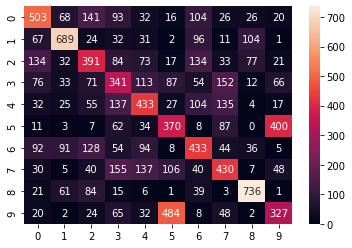

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

In [20]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [23]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = input_columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

ValueError: Length of feature_names, 50000 does not match number of features, 12